In [2]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.manifold import TSNE
# from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

In [3]:
#os.chdir("C:/Users/Kyeongjun/Desktop/LG가전데이터")
oven_c = pd.read_csv("oven_clustering.csv")

In [4]:
# data normalization
df = pd.DataFrame(preprocessing.normalize(oven_c.iloc[:,1:]), columns = oven_c.iloc[:,1:].columns)
oven_cn = pd.concat([oven_c[['DEVICE_ID']],df], axis=1)

del df

# 1. k-means clustering

## 1-1. all variables

<ipython-input-5-839725e7b757>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(4, 3), dpi=80)


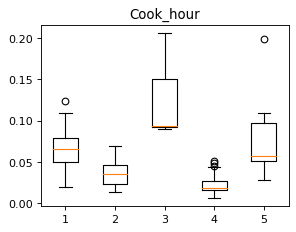

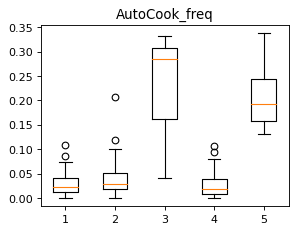

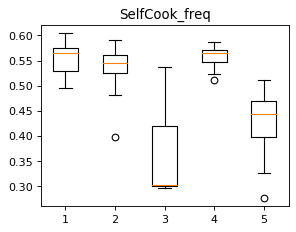

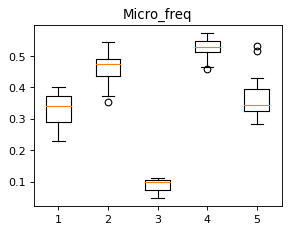

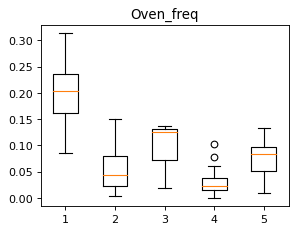

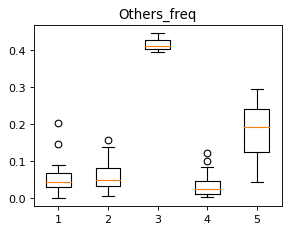

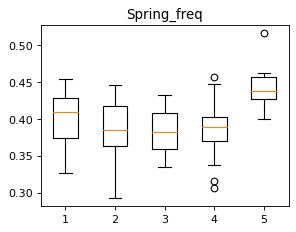

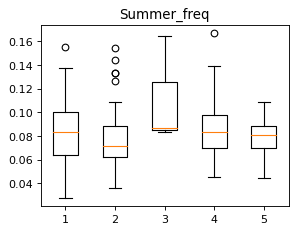

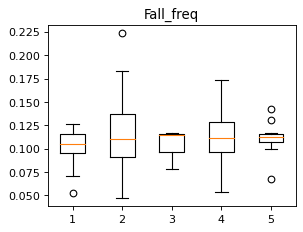

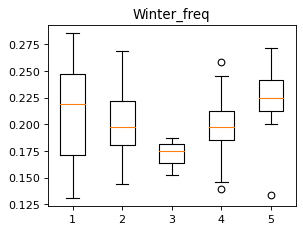

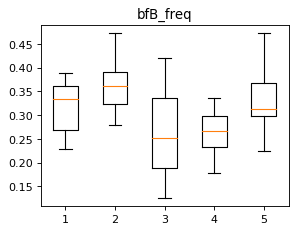

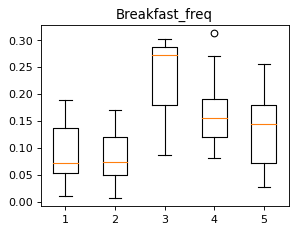

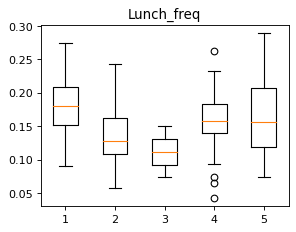

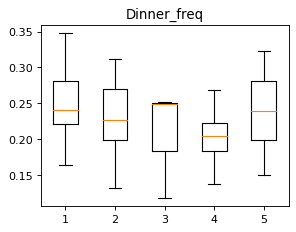

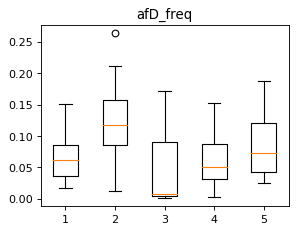

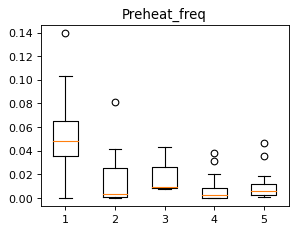

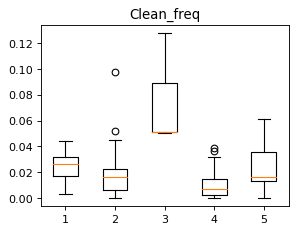

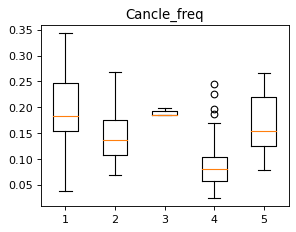

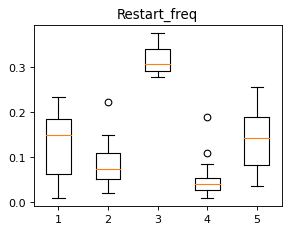

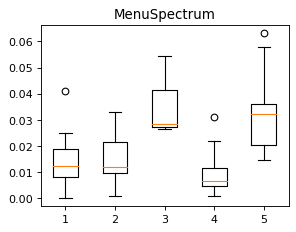

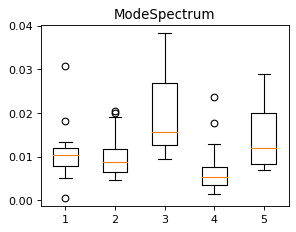

In [5]:
data_points = oven_cn.iloc[:,1:].values
kmeans = KMeans(n_clusters=5).fit(data_points)
kmeans.fit(oven_cn.iloc[:,1:])

oven_cn['cluster_id'] = kmeans.labels_

c0 = oven_cn.loc[oven_cn['cluster_id'] == 0,].iloc[:,1:22]
c1 = oven_cn.loc[oven_cn['cluster_id'] == 1,].iloc[:,1:22]
c2 = oven_cn.loc[oven_cn['cluster_id'] == 2,].iloc[:,1:22]
c3 = oven_cn.loc[oven_cn['cluster_id'] == 3,].iloc[:,1:22]
c4 = oven_cn.loc[oven_cn['cluster_id'] == 4,].iloc[:,1:22]

for i in range(21) : 
    figure(figsize=(4, 3), dpi=80)
    plt.boxplot([list(c0.iloc[:,i]),list(c1.iloc[:,i]),list(c2.iloc[:,i]),list(c3.iloc[:,i]),list(c4.iloc[:,i])])
    plt.title(c0.columns[i])

del c0, c1, c2, c3, c4, data_points

## 1-2. 주요 6변수

In [6]:
oven_cn_6 = oven_cn.iloc[:,[1,2,3,4,5,21]]

data_points = oven_cn_6.values
kmeans = KMeans(n_clusters=4).fit(data_points)
kmeans.fit(oven_cn_6)

oven_cn['cluster_id'] = kmeans.labels_ # 주요 6변수로 k-means 하는 것으로 최종 선택됨

## 1-3. 총 사용시간 X 사용 메뉴 개수

C:\Users\admin45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-7-665b9b1820a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oven_c3['cluster_id'] = kmeans.labels_          # cluster labeling
C:\Users\admin45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in 

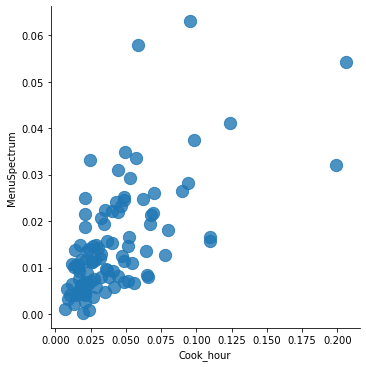

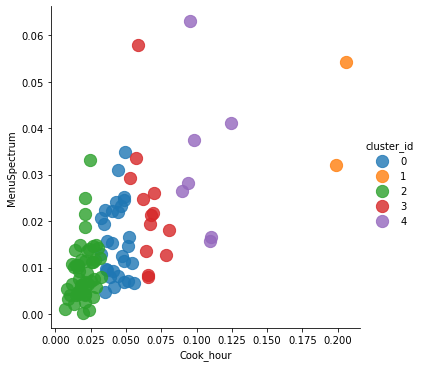

In [7]:
oven_c3 = oven_cn.iloc[:,[1,20]]     # 변수 선택

sns.lmplot('Cook_hour', 'MenuSpectrum', data=oven_c3, fit_reg=False,
           scatter_kws={"s": 150})  # 시각화

data_points = oven_c3.values
kmeans = KMeans(n_clusters=5).fit(data_points)  # 모델 생성 (k = 3)
kmeans.fit(oven_c3)                             # fitting

oven_c3['cluster_id'] = kmeans.labels_          # cluster labeling

sns.lmplot('Cook_hour', 'MenuSpectrum', data=oven_c3, fit_reg=False,
           scatter_kws={"s": 150}, hue="cluster_id")    # cluster 시각화

## 1-4. 총 사용시간 X 사용 모드 개수

C:\Users\admin45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-8-2ab90288ad94>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oven_c4['cluster_id'] = kmeans.labels_
C:\Users\admin45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

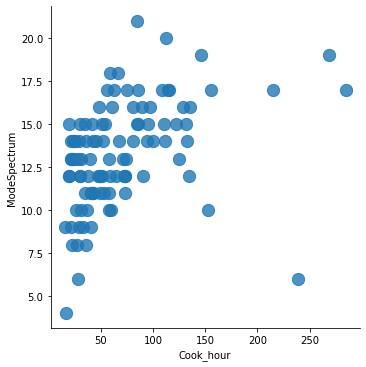

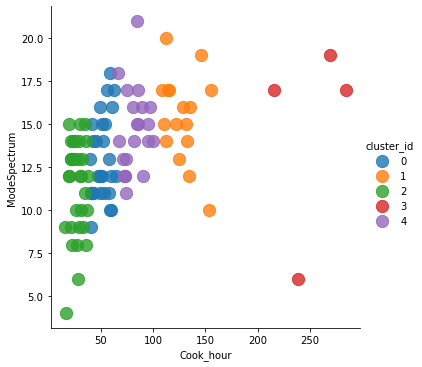

In [8]:
oven_c4 = oven_c.iloc[:,[1,21]]

sns.lmplot('Cook_hour', 'ModeSpectrum', data=oven_c4, fit_reg=False,
           scatter_kws={"s": 150})

data_points = oven_c4.values
kmeans = KMeans(n_clusters=5).fit(data_points)
kmeans.fit(oven_c4)

oven_c4['cluster_id'] = kmeans.labels_

sns.lmplot('Cook_hour', 'ModeSpectrum', data=oven_c4, fit_reg=False,
           scatter_kws={"s": 150}, hue="cluster_id")

## 1-5. 총 사용시간 X 청소 횟수

C:\Users\admin45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin45\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


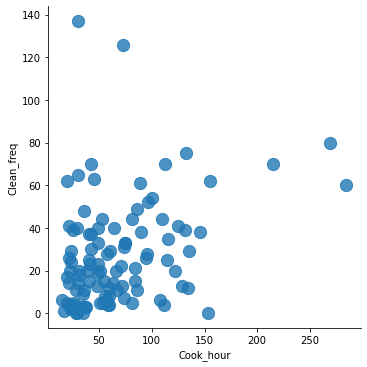

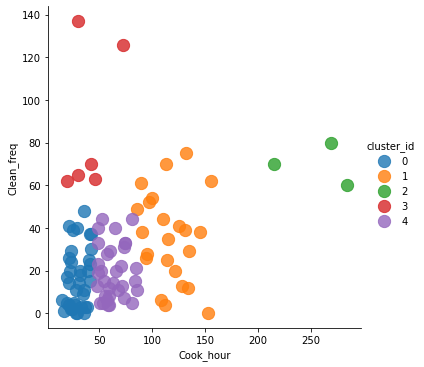

In [9]:
oven_c5 = oven_c.iloc[:,[1,17]]
oven_c5 = oven_c5.loc[oven_c5['Clean_freq']<200,] # 청소 500회 이상 이상치 1개 제거

sns.lmplot('Cook_hour', 'Clean_freq', data=oven_c5, fit_reg=False,
           scatter_kws={"s": 150})

data_points = oven_c5.values
kmeans = KMeans(n_clusters=5).fit(data_points)
kmeans.fit(oven_c5)

oven_c5['cluster_id'] = kmeans.labels_

sns.lmplot('Cook_hour', 'Clean_freq', data=oven_c5, fit_reg=False,
           scatter_kws={"s": 150}, hue="cluster_id")

# 2. spectral clustering

## 2-1. all variables

C:\Users\admin45\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
<ipython-input-10-792b2a88616b>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(4, 3), dpi=80)


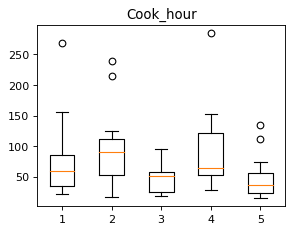

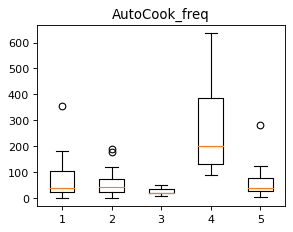

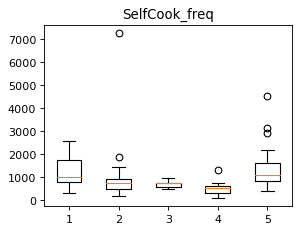

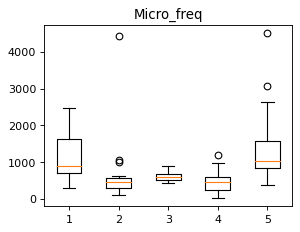

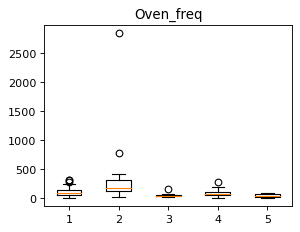

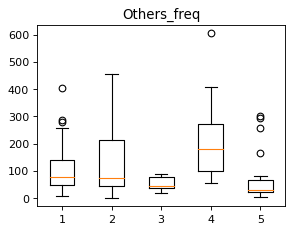

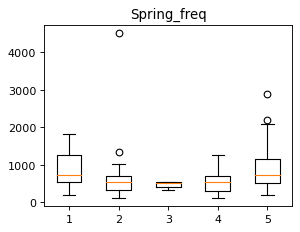

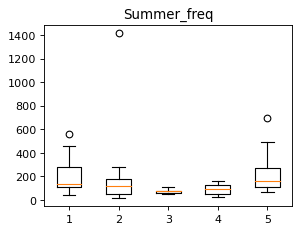

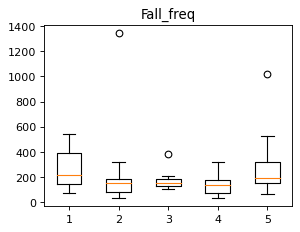

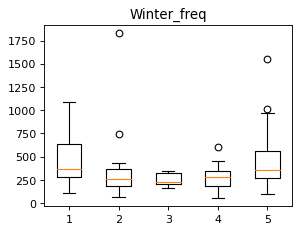

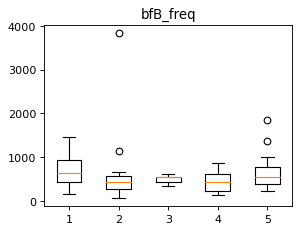

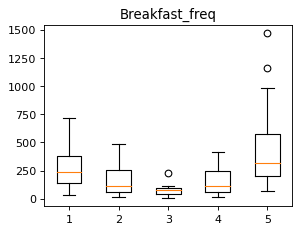

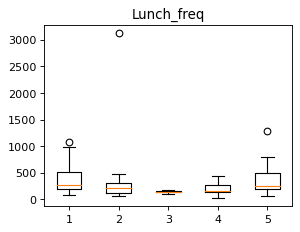

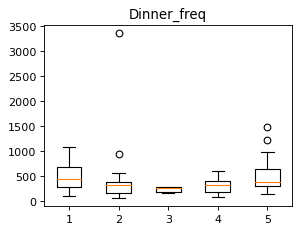

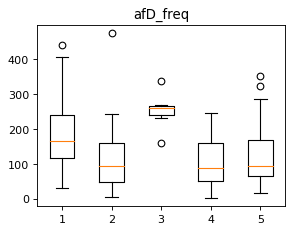

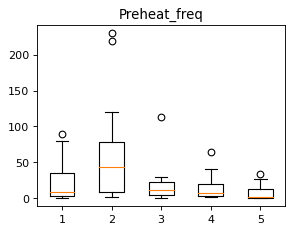

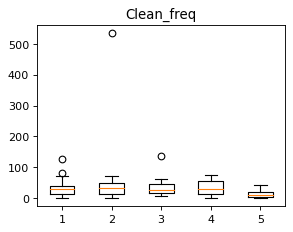

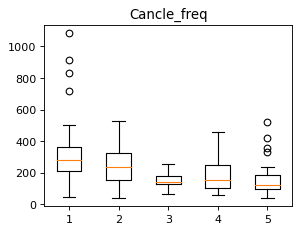

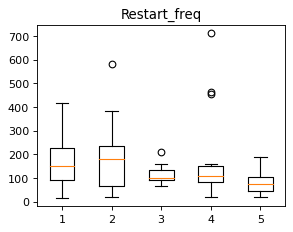

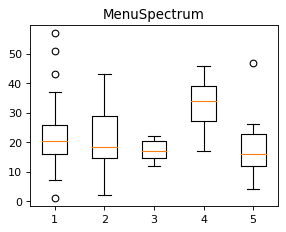

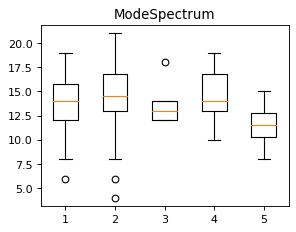

In [10]:
cluster = SpectralClustering(n_clusters=5, n_neighbors=5, affinity='nearest_neighbors').fit_predict(oven_cn.iloc[:,1:])
oven_spec = oven_cn.copy(deep=True)
oven_spec['cluster_id'] = cluster

sc0 = oven_c.loc[oven_spec['cluster_id'] == 0,].iloc[:,1:22]
sc1 = oven_c.loc[oven_spec['cluster_id'] == 1,].iloc[:,1:22]
sc2 = oven_c.loc[oven_spec['cluster_id'] == 2,].iloc[:,1:22]
sc3 = oven_c.loc[oven_spec['cluster_id'] == 3,].iloc[:,1:22]
sc4 = oven_c.loc[oven_spec['cluster_id'] == 4,].iloc[:,1:22]

for i in range(21) : 
    figure(figsize=(4, 3), dpi=80)
    plt.boxplot([list(sc0.iloc[:,i]),list(sc1.iloc[:,i]),list(sc2.iloc[:,i]),list(sc3.iloc[:,i]),list(sc4.iloc[:,i])])
    plt.title(sc0.columns[i])

## 2-2. 주요 6변수

In [11]:
cluster_6 = SpectralClustering(n_clusters=5, n_neighbors=5, affinity='nearest_neighbors').fit_predict(oven_cn.iloc[:,[1,2,3,4,5,21]])
oven_spec['cluster_id'] = cluster_6

# 3. PCA before k-means clustering

## 3-1. PCA

In [12]:
pca = PCA(n_components=3)

components = pca.fit_transform(oven_c.iloc[:,[2,3,4,5,6,19]])

pcadf = pd.DataFrame(data = components, columns = ['pc1', 'pc2','pc3'])

pcadf = pd.concat([oven_c[['DEVICE_ID']],pcadf], axis = 1)

coefficients = pd.DataFrame(list(zip(oven_c.columns[[2,3,4,5,6,19]], pca.components_[0], pca.components_[1],pca.components_[2])), columns = ['varname','pc1','pc2','pc3'])
coefficients.sort_values(by=['pc1','pc2','pc3'], ascending = False)

,varname,pc1,pc2,pc3
1,SelfCook_freq,0.765717,0.297348,0.016231
2,Micro_freq,0.628805,-0.532237,-0.018575
3,Oven_freq,0.134359,0.790908,-0.044437
5,Restart_freq,0.014391,0.044043,0.596405
4,Others_freq,-0.001786,0.012820,0.604678
0,AutoCook_freq,-0.004339,-0.025858,0.525435


In [13]:
pca.explained_variance_ratio_       # 각 컴포넌트의 설명력
sum(pca.explained_variance_ratio_)  # 3개의 컴포넌트가 전체 분산의 99%를 설명

0.9906247503991606

## 3-2. k-means clustering using principal components

In [14]:
# k-means와 spectral clustering 클러스터 개수 확인
oven_cn['cluster_id'].value_counts()
oven_spec['cluster_id'].value_counts()

data_points = pcadf.iloc[:,1:]
kmeans = KMeans(n_clusters=5).fit(data_points)
kmeans.fit(pcadf.iloc[:,1:])

oven_pca = oven_c.copy(deep=True)
oven_pca['cluster_id'] = kmeans.labels_
# DEVICE_ID 10,22번은 따로 하나씩 분류됨

# 4. visualizing data using t-sne

## 4-1. making t-sne model

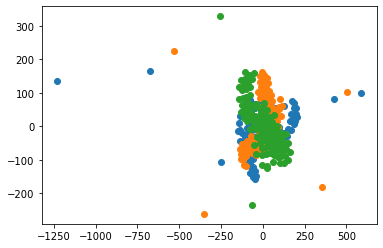

In [15]:
n_components = 2 # 2차원으로 시각화

# perplexity 비교
model_p10 = TSNE(n_components = n_components, perplexity = 10)
model_p30 = TSNE(n_components = n_components, perplexity = 30)
model_p50 = TSNE(n_components = n_components, perplexity = 50)

# component 1,2를 x, y로 저장
x0, y0 = [],[]
k = model_p10.fit_transform(oven_c.iloc[:,1:-1])
for i in range(103) :
    x0.append(k[i][0])
    y0.append(k[i][1])

x1, y1 = [],[]
k = model_p30.fit_transform(oven_c.iloc[:,1:-1])
for i in range(103) :
    x1.append(k[i][0])
    y1.append(k[i][1])

x2, y2 = [],[]
k = model_p50.fit_transform(oven_c.iloc[:,1:-1])
for i in range(103) :
    x2.append(k[i][0])
    y2.append(k[i][1])

# x=x, y=y로 시각화 (perplexity 30으로 결정)
plt.scatter(x0,y0)
plt.scatter(x1,y1)
plt.scatter(x2,y2)

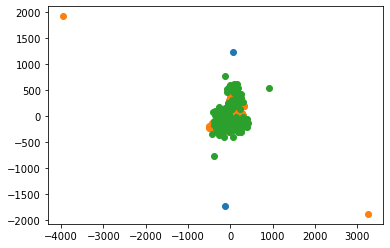

In [16]:
# learning_rate 비교
model_lr2 = TSNE(n_components = n_components, perplexity = 30, learning_rate = 200)
model_lr5 = TSNE(n_components = n_components, perplexity = 30, learning_rate = 500)
model_lr8 = TSNE(n_components = n_components, perplexity = 30, learning_rate = 800)

# component 1,2를 x, y로 저장
x0, y0 = [],[]
k = model_lr2.fit_transform(oven_c.iloc[:,1:-1])
for i in range(103) :
    x0.append(k[i][0])
    y0.append(k[i][1])

x1, y1 = [],[]
k = model_lr5.fit_transform(oven_c.iloc[:,1:-1])
for i in range(103) :
    x1.append(k[i][0])
    y1.append(k[i][1])

x2, y2 = [],[]
k = model_lr8.fit_transform(oven_c.iloc[:,1:-1])
for i in range(103) :
    x2.append(k[i][0])
    y2.append(k[i][1])

# x=x, y=y로 시각화 (learning_rate 200으로 결정)
plt.scatter(x0,y0)
plt.scatter(x1,y1)
plt.scatter(x2,y2)

del i, x0,x1,x2, y0,y1,y2, k

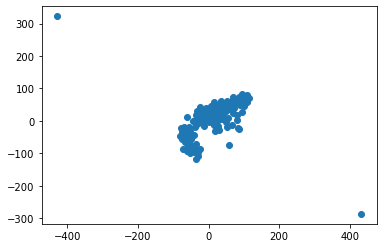

In [17]:
# 최종 모델 선택 및 시각화
model = TSNE(n_components = n_components, perplexity = 30, learning_rate = 200)

x, y = [],[]
k = model.fit_transform(oven_c.iloc[:,1:-1])
for i in range(103) :
    x.append(k[i][0])
    y.append(k[i][1])

plt.scatter(x,y)

In [18]:
# 적절한 df 저장
model_df = pd.DataFrame(list(zip(x,y)), columns = ['x','y'])

model_df = pd.DataFrame(list(zip(x,y)), columns = ['x','y'])
model_df.to_csv('tsne.csv', header=True, index=False)


## 4-2. t-sne with k-means

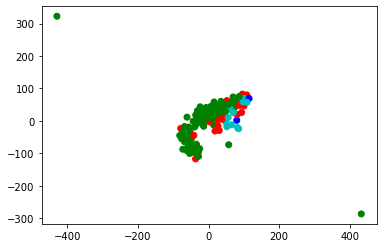

In [19]:
categories = np.array(oven_cn['cluster_id'])
colormap = np.array(['r','g','b','c'])

plt.scatter(x,y, c=colormap[categories])

## 4-3. t-sne with spectral clustering

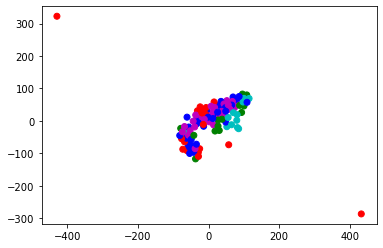

In [20]:
categories = np.array(oven_spec['cluster_id'])
colormap = np.array(['r','g','b','c', 'm'])

plt.scatter(x,y, c=colormap[categories])

## 4-4. t-sne with PCA k-means

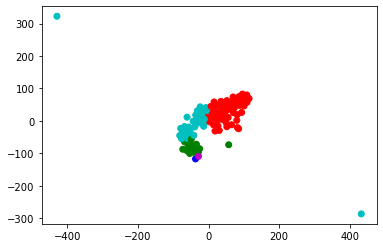

In [21]:
categories = np.array(oven_pca['cluster_id'])
colormap = np.array(['r','g','b','c', 'm'])

plt.scatter(x,y, c=colormap[categories])

# 5. Final clustering

In [22]:
## 5-0. 과정 설명

# 주요 6개 변수를 이용하여 3개 componenet로 PCA를 진행합니다.
# PCA 결과 나온 3개의 principal components들을 입력변수로 클러스터가 3개인 k-means 클러스터링을 진행합니다.
# 주요 6개 변수 데이터를(6차원) t-sne를 통해 2차원으로 시각화합니다.
# 위의 t-sne 시각화에 클러스터별로 색깔을 다르게 표시하여 적절히 클러스터링 되었는지 확인합니다.

## 5-1. PCA

In [23]:
pca = PCA(n_components=3)

components = pca.fit_transform(oven_c.iloc[:,[2,3,4,5,6,19]])

pca_final = pd.DataFrame(data = components, columns = ['pc1', 'pc2','pc3'])

pca_final = pd.concat([oven_c[['DEVICE_ID']],pca_final], axis = 1)

## 5-2. k-means clustering with PCA components

In [24]:
data_points = pca_final.iloc[:,1:]
kmeans = KMeans(n_clusters=3).fit(data_points)
kmeans.fit(pca_final.iloc[:,1:])

oven_final = oven_c.copy(deep=True)
oven_final['cluster_id'] = kmeans.labels_

## 5-3. 클러스터별 pincipal components 비교

In [25]:
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)  # 3개의 컴포넌트가 전체 분산의 99%를 설명

0.9906247503991606

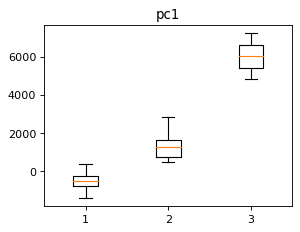

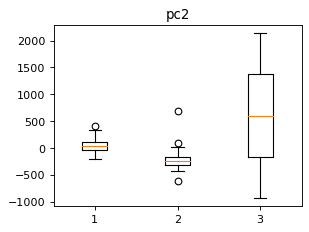

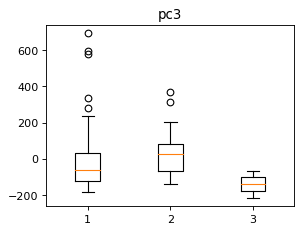

In [26]:
coefficients = pd.DataFrame(list(zip(oven_c.columns[[2,3,4,5,6,19]], pca.components_[0], pca.components_[1],pca.components_[2])), columns = ['varname','pc1','pc2','pc3'])
coefficients.sort_values(by=['pc1','pc2','pc3'], ascending = False)

pca_final['cluster_id'] = kmeans.labels_

c0 = pca_final.loc[pca_final['cluster_id'] == 0,].iloc[:,1:-1]
c1 = pca_final.loc[pca_final['cluster_id'] == 1,].iloc[:,1:-1]
c2 = pca_final.loc[pca_final['cluster_id'] == 2,].iloc[:,1:-1]

for i in range(3) : 
    figure(figsize=(4, 3), dpi=80)
    plt.boxplot([list(c0.iloc[:,i]),list(c1.iloc[:,i]),list(c2.iloc[:,i])])
    plt.title(c0.columns[i])

del c0, c1, c2, data_points

## 5-4. 클러스터별 변수 비교 (6개)

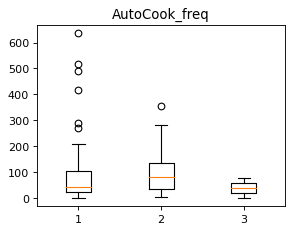

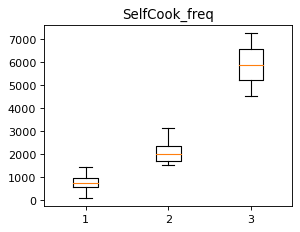

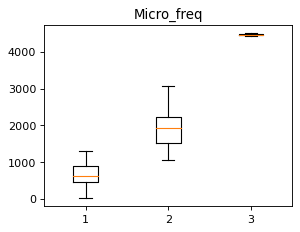

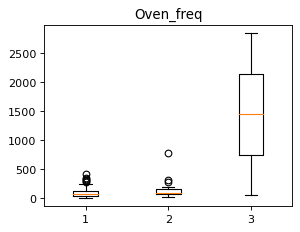

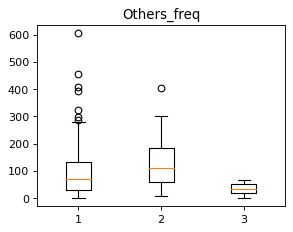

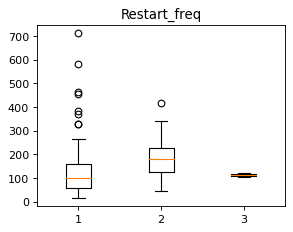

In [27]:
df = oven_final.iloc[:,[2,3,4,5,6,19,22]]

c0 = df.loc[df['cluster_id'] == 0,]
c1 = df.loc[df['cluster_id'] == 1,]
c2 = df.loc[df['cluster_id'] == 2,]

for i in range(6) : 
    figure(figsize=(4, 3), dpi=80)
    plt.boxplot([list(c0.iloc[:,i]),list(c1.iloc[:,i]),list(c2.iloc[:,i])])
    plt.title(c0.columns[i])

del c0, c1, c2

# 6. t-sne visualization of final clusters

## 6-1. t-sne

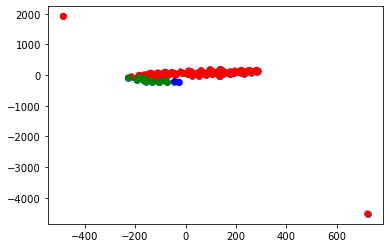

In [28]:
n_components = 2
model = TSNE(n_components = n_components, perplexity = 30, learning_rate = 400)

x, y = [],[]
k = model.fit_transform(oven_c.iloc[:,[2,3,4,5,6,19]])
for i in range(103) :
    x.append(k[i][0])
    y.append(k[i][1])

plt.scatter(x,y)

# color by clusters
categories = np.array(oven_final['cluster_id'])
colormap = np.array(['r','g','b'])

plt.scatter(x,y, c=colormap[categories])
# DEVICE_ID 10, 22번은 여전히 다른 클러스터로 분류됨

# 7. U-MAP visualization of final clusters

## 7-1. construct umap object and fitting data

In [29]:
reducer = umap.UMAP()

Text(0.5, 1.0, 'UMAP projection of oven dataset')

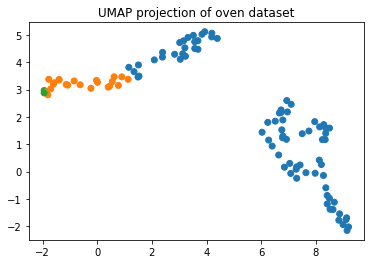

In [30]:
# select 6 variables and standardization
oven_final = oven_final.iloc[:,[2,3,4,5,6,19,22]]
# UMAP
embedding1 = reducer.fit_transform(oven_final.iloc[:,:-1])

plt.scatter(embedding1[:,0], embedding1[:,1],
            c=[sns.color_palette()[x] for x in oven_final.cluster_id])
plt.gca().set_aspect('equal','datalim')
plt.title('UMAP projection of oven dataset')